<a href="https://colab.research.google.com/github/renisio/18-Redes-Neurais-Pneumonia-Covid-19-Tuberculosis-/blob/main/2_EfficientNetB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDE NURAL EfficientNetB0

# Introdução 



*  *Importar os pacotes*
*  *Carregar os dados*
* *Visualizar os dados* 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#GPU

import tensorflow
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('No hay GPU')
print('Found GPU at: {}'.format(device_name))   

Found GPU at: /device:GPU:0


In [ ]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 17.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=43869f1c41a7c37fb83dd3edc88b06ff60279565725ccec0d2ccfffb61d24d49
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# Garregando as imagens 



In [ ]:

paths = ['/content/drive/MyDrive/Dados/Dados 3/train', '/content/drive/MyDrive/Dados/Dados 3/test']

total_count = 0
for path in paths:
    count = 0
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                count += 1
    total_count += count

print('Numero total de imagens: {}'.format(total_count))


Numero total de imagens: 9147


In [ ]:
paths = ['/content/drive/MyDrive/Dados/Dados 3/train/COVID19', '/content/drive/MyDrive/Dados/Dados 3/test']

total_count = 0
for path in paths:
    count = 0
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                count += 1
    total_count += count

COVID19 = total_count
Covid19 = 'Covid19'

print('{}: {}'.format(Covid19, COVID19))

paths = ['/content/drive/MyDrive/Dados/Dados 3/train/NORMAL', '/content/drive/MyDrive/Dados/Dados 3/test/NORMAL']

total_count = 0
for path in paths:
    count = 0
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                count += 1
    total_count += count

NORMAL = total_count
result_name = 'Normal'

print('{}: {}'.format(result_name, NORMAL))

paths = ['/content/drive/MyDrive/Dados/Dados 3/train/PNEUMONIA', '/content/drive/MyDrive/Dados/Dados 3/test/PNEUMONIA']

total_count = 0
for path in paths:
    count = 0
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                count += 1
    total_count += count

PNEUMONIA = total_count
result_name = 'Pneumonia'

print('{}: {}'.format(result_name, PNEUMONIA))

paths = ['/content/drive/MyDrive/Dados/Dados 3/train/TURBERCULOSIS', '/content/drive/MyDrive/Dados/Dados 3/test/TURBERCULOSIS']

total_count = 0
for path in paths:
    count = 0
    for subdir, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                count += 1
    total_count += count

TURBERCULOSIS = total_count
result_name = 'Turberculosi'

print('{}: {}'.format(result_name, TURBERCULOSIS))

Covid19: 1631
Normal: 2575
Pneumonia: 4465
Turberculosi: 1141


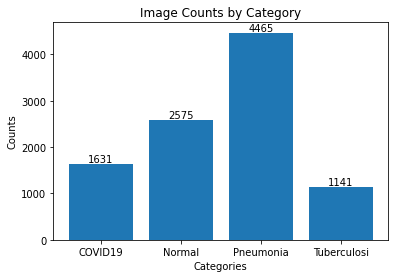

In [ ]:

categories = ['COVID19', 'Normal', 'Pneumonia', 'Tuberculosi']
counts = [1631, 2575, 4465, 1141]

fig, ax = plt.subplots()

rects = ax.bar(categories, counts)
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Image Counts by Category')

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, height, ha='center', va='bottom')

plt.show()


# Pré-processamento de dados



*   Armazenar a imagens no X e Classes no Y
*   Embaralhar 
*   Dividir o grupo de treino e test 
*   Transformar a variavel categorica em binario 






In [ ]:
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

In [ ]:
# X são os dados e y suas respctiveis clases 
X_train = []  # Criando e irei addcionar neste diretorio 
y_train = []  # Criando e irei addcionar neste diretorio 
image_size = 224 # Alterando o tamanho da imagem por 224 x 224 para cada item do diretorio 
for i in labels: # Percorrer cada item do diretorio 
    folderPath = os.path.join('/content/drive/MyDrive/Dados/Dados 3','train',i) # Link para abrir a pasta train
    for j in tqdm(os.listdir(folderPath)): #Faça com que seus loops mostrem instantaneamente um medidor de progresso inteligente
        img = cv2.imread(os.path.join(folderPath,j)) #retorna uma matriz 2D ou 3D com base no número de canais de cores presentes na imagem.
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # Todas imgaens em RGB da pasta train
        img = cv2.resize(img,(image_size, image_size)) # Alterando o tamanho da imagem por 224 x 224 as todas imagens da pasta train
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Dados/Dados 3','test',i) # Link para abrir a pasta train
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # Todas imgaens em RGB da pasta train 
        img = cv2.resize(img,(image_size,image_size)) # Alterando o tamanho da imagem por 224 x 224 as todas imagens da pasta test
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 41/41 [00:10<00:00,  3.97it/s]


In [ ]:
print("Imagens de treino variavel X", X_train.shape)
print("Imagens de treino variavel y", y_train.shape)

Imagens de treino variavel X (9147, 224, 224, 3)
Imagens de treino variavel y (9147,)


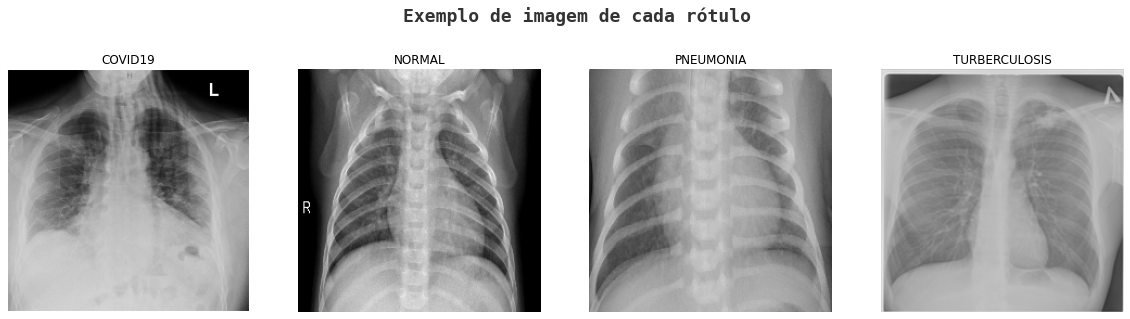

In [ ]:
#  ax criar uma grade de subplots,
#  plt.subplots1,4, linhas e colunas   figsize=(20,20)) tamnhanho

k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Exemplo de imagem de cada rótulo',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8) 
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
#Embaralhar 

# shuffle comumente usada para embaralhar elementos de uma lista antes de usá-los para treinamento de modelos de aprendizado de máquina ou para criar amostras aleatórias de um conjunto de dados.

# random_state=101  Isso significa que, a cada vez que a função é chamada com o mesmo valor para random_state, os mesmos resultados serão gerados.

X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
# serparando os dados de treino e teste, e clases de treino e teste 
#train_test_split vai dividir o dataset em treino e teste 
#test_size vai seprar para o meus teste a porcentagem 
#random_state=101 nivel de aleatoridade, parâmetro controla como os dados são embaralhados antes de serem divididos.


X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)



In [ ]:
#Executando One Hot Encoding nos rótulos após convertê-lo em valores numéricos\

#One Hot Encoding é uma representação de variáveis ​​categóricas como vetores binários. 
       #Podemos atribuir a 'vermelho' um valor inteiro de 0 e 'verde' o valor inteiro de 1.

#One-hot encoding é um processo de codificação de dados categóricos, onde uma variável categórica 
#é convertida em um vetor binário com uma única posição a 1 e as demais a 0. Isso é útil quando
#se está trabalhando com algoritmos de aprendizado de máquina que não podem lidar diretamente com
# variáveis categóricas, pois esses algoritmos geralmente esperam valores numéricos.

y_train_new = []
for i in y_train: #para  [item]  em  [sequência] : Execute o  código
    y_train_new.append(labels.index(i)) # adcionou no y_train_new o vetor de as clases do y_train 
y_train = y_train_new # o y_train agora é y_train_new
y_train = tf.keras.utils.to_categorical(y_train) #converter o vetor y_train de classe na matriz da classe binária

# igual de linhas do comprimento do vetor de entrada e o número da coluna que é igual ao número da classe que definimos em nosso código

y_test_new = []
for i in y_test: #para  [item]  em  [sequência] : Execute o  código
    y_test_new.append(labels.index(i)) #adcionou no y_train_new o vetor de as clases do y_train 
y_test = y_test_new # o y_train agora é y_train_new
y_test = tf.keras.utils.to_categorical(y_test)  #converter o vetor y_test de classe na matriz da classe binária



In [ ]:
print("Imagens de Treino variavel X", X_train.shape)
print("Imagens de Treino variavel y", y_train.shape)
print("Imagens de Teste variavel X", X_test.shape)
print("Imagens de Teste variavel y", y_test.shape)

Imagens de Treino variavel X (7317, 224, 224, 3)
Imagens de Treino variavel y (7317, 4)
Imagens de Teste variavel X (1830, 224, 224, 3)
Imagens de Teste variavel y (1830, 4)


# Rede Neural Trans Learning :EfficientNetB1

In [ ]:
#Definir o modelo (definir o total de camada , quantas neuronios cada camada tera, as funçoes de ativiação e como as camadas se interconectam )
# Carregando o modelo MobileNetV2 sem as camadas densas
!pip install efficientnet

from efficientnet.keras import EfficientNetB1

conv_base = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.4 MB/s eta 0:00:00
27164032/27164032 [==============================] - 0s 0us/step


In [ ]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

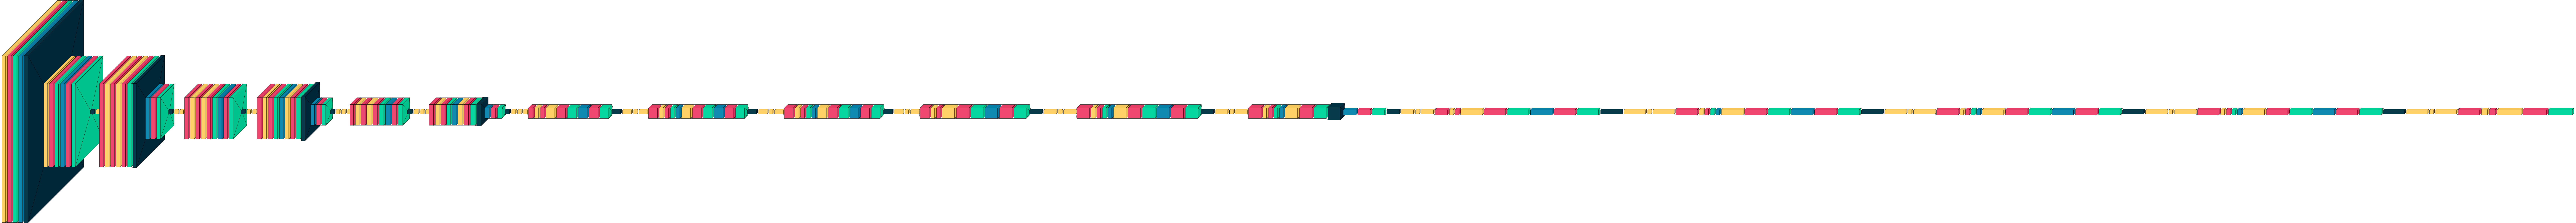

In [ ]:
visualkeras.layered_view(efficientNet)

In [ ]:
numberOfClass = 4

In [ ]:
# Adicionando camadas adicionais

numberOfClass=4

conv_base = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3))

model = conv_base.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(numberOfClass, activation='softmax')(model)
model = tf.keras.models.Model(inputs=conv_base.input, outputs=model)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                             

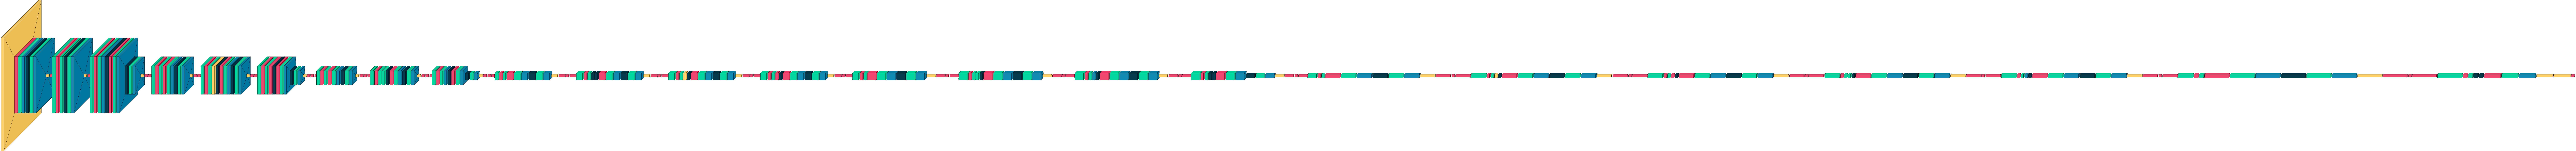

In [ ]:
visualkeras.layered_view(model)

In [ ]:
#Hyperparametros

#O otimizador é uma parte crucial do treinamento de uma rede neural. Ele é responsável 
#por ajustar os pesos da rede ao longo do tempo para que a função de perda seja minimizada. 
#Em outras palavras, o otimizador é o que permite que o modelo aprenda a partir dos dados.


#Compilar o modelo (definir o algoritimo a computar os gradientes, as metricas capazes de avaliar erros, e a função de erro  )

model.compile(loss='categorical_crossentropy', # A função de perda vai calcular o tanto que a rede esta errando, a diferença do resultado ideal com quanto a rede esta oferencendo na pratica,,
                                               # Saida é uma probalidade. Usado como uma função de perda para o modelo de classificação multiclasse onde há dois ou mais rótulos de saída.
              optimizer = 'Adam', # Quem vai fazer os calculos para ajustar os pessos da rede neural 
              metrics= ['accuracy']) # A precisão é uma medida de quão bem o modelo está realizando suas previsões e é uma das métricas mais comuns usadas para avaliar o desempenho de um modelo de classificação

In [ ]:
#TensorBoard: medidas e visualizações necessárias durante o fluxo de trabalho de aprendizado de máquina.
             # Ele permite rastrear métricas de experimentos como perda e precisão, visualizar o gráfico do modelo

#ModelCheckpoint : salvar um modelo ou pesos (em um arquivo de ponto de verificação) em algum intervalo,
                  #para que o modelo ou os pesos possam ser carregados posteriormente para continuar o treinamento a partir do estado salvo.
                  #save_best_only = Salvar o melhor modelo #verbose= mostra a barra de progresso #mode = queremos monitorar o "val_accurracy

#ReduceLROnPlateau:  Este retorno de chamada monitora uma quantidade e se nenhuma melhora for observada por um número de 'paciência' 
                     # de épocas, a taxa de aprendizado é reduzida

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', #monitor = metrica a ser monitorada 
                              factor = 0.1, #fator pelo qual a taxa de aprendizado será reduzida.
                              patience = 2, #número de épocas sem melhora após as quais a taxa de aprendizado será reduzida.
                              min_delta = 0.001, #limite para medir o novo ótimo, para focar apenas em mudanças significativas.
                              mode='auto',verbose=1) # verbose= mostra a barra de progresso, mode = queremos monitorar o "val_accurracy" queremo valor maximo

# Treinando a rede neural 

In [ ]:
# Fazendo a rede aprender na pratica 

hist = model.fit(X_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =15, # 15  epocas 
                 verbose=1, #mostra a barra de progresso
                 batch_size=32, # configura  a  quantidade  de imagens por lote no processamento, Vai processar de 32 imagens por vez 
                  callbacks=[tensorboard,checkpoint,reduce_lr] # definidos anteriormente 
                 )

Epoch 1/15
206/206 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9306

206/206 [==============================] - 131s 367ms/step - loss: 0.2098 - accuracy: 0.9306 - val_loss: 0.3779 - val_accuracy: 0.9508 - lr: 0.0010
Epoch 2/15
206/206 [==============================] - ETA: 0s - loss: 0.1083 - accuracy: 0.9619

206/206 [==============================] - 74s 361ms/step - loss: 0.1083 - accuracy: 0.9619 - val_loss: 0.0510 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 3/15
206/206 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.9783

206/206 [==============================] - 73s 356ms/step - loss: 0.0570 - accuracy: 0.9783 - val_loss: 0.0510 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 4/15
206/206 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9851


Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
206/206 [==============================] - 74s 361ms/step - loss: 0.0447 - accuracy: 0.9851 - val_loss: 0.0929 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 5/15
206/206 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9929

206/206 [==============================] - 74s 361ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0356 - val_accuracy: 0.9904 - lr: 1.0000e-04
Epoch 6/15
206/206 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9973

206/206 [==============================] - 73s 355ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0449 - val_accuracy: 0.9891 - lr: 1.0000e-04
Epoch 7/15
206/206 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9971


Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
206/206 [==============================] - 73s 355ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0452 - val_accuracy: 0.9891 - lr: 1.0000e-04
Epoch 8/15
206/206 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9986

206/206 [==============================] - 73s 356ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0472 - val_accuracy: 0.9904 - lr: 1.0000e-05
Epoch 9/15
206/206 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9985


Epoch 9: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
206/206 [==============================] - 73s 356ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0479 - val_accuracy: 0.9904 - lr: 1.0000e-05
Epoch 10/15
206/206 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9985

206/206 [==============================] - 74s 361ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0494 - val_accuracy: 0.9904 - lr: 1.0000e-06
Epoch 11/15
206/206 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9983


Epoch 11: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
206/206 [==============================] - 74s 361ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0489 - val_accuracy: 0.9904 - lr: 1.0000e-06
Epoch 12/15
206/206 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9979

206/206 [==============================] - 73s 356ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0488 - val_accuracy: 0.9904 - lr: 1.0000e-07
Epoch 13/15
206/206 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9985


Epoch 13: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
206/206 [==============================] - 73s 356ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0486 - val_accuracy: 0.9904 - lr: 1.0000e-07
Epoch 14/15
206/206 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9986

206/206 [==============================] - 73s 356ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0491 - val_accuracy: 0.9904 - lr: 1.0000e-08
Epoch 15/15
206/206 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9985


Epoch 15: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
206/206 [==============================] - 74s 360ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0484 - val_accuracy: 0.9904 - lr: 1.0000e-08


In [ ]:
results = model.evaluate(X_train,y_train)

229/229 [==============================] - 18s 78ms/step - loss: 0.0056 - accuracy: 0.9990


# Resultados 

In [ ]:
results2 = model.evaluate(X_test,y_test)

58/58 [==============================] - 5s 84ms/step - loss: 0.0752 - accuracy: 0.9836


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


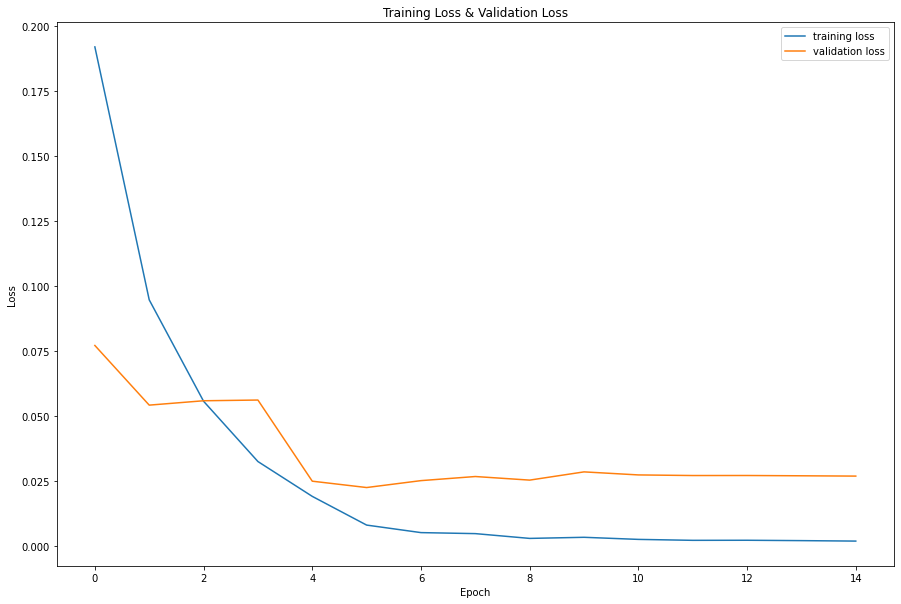

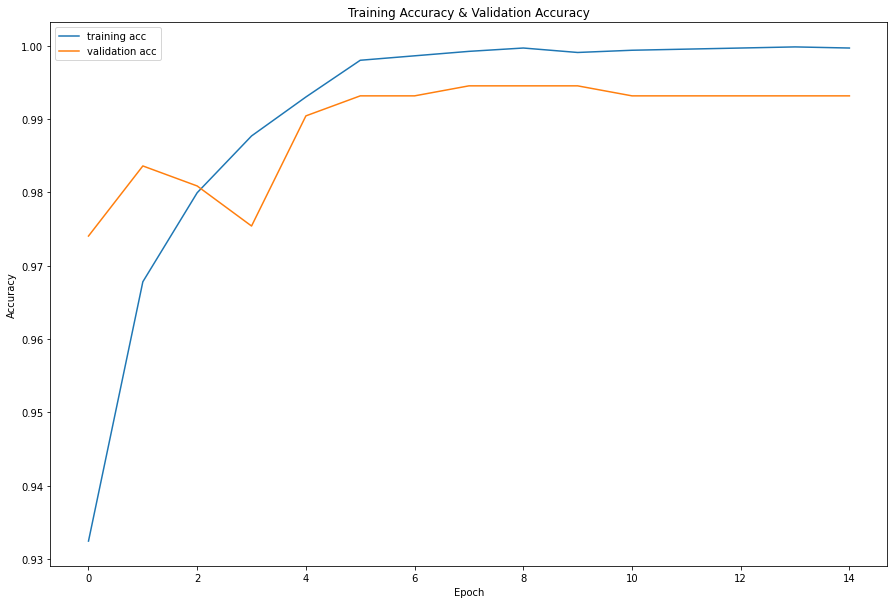

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

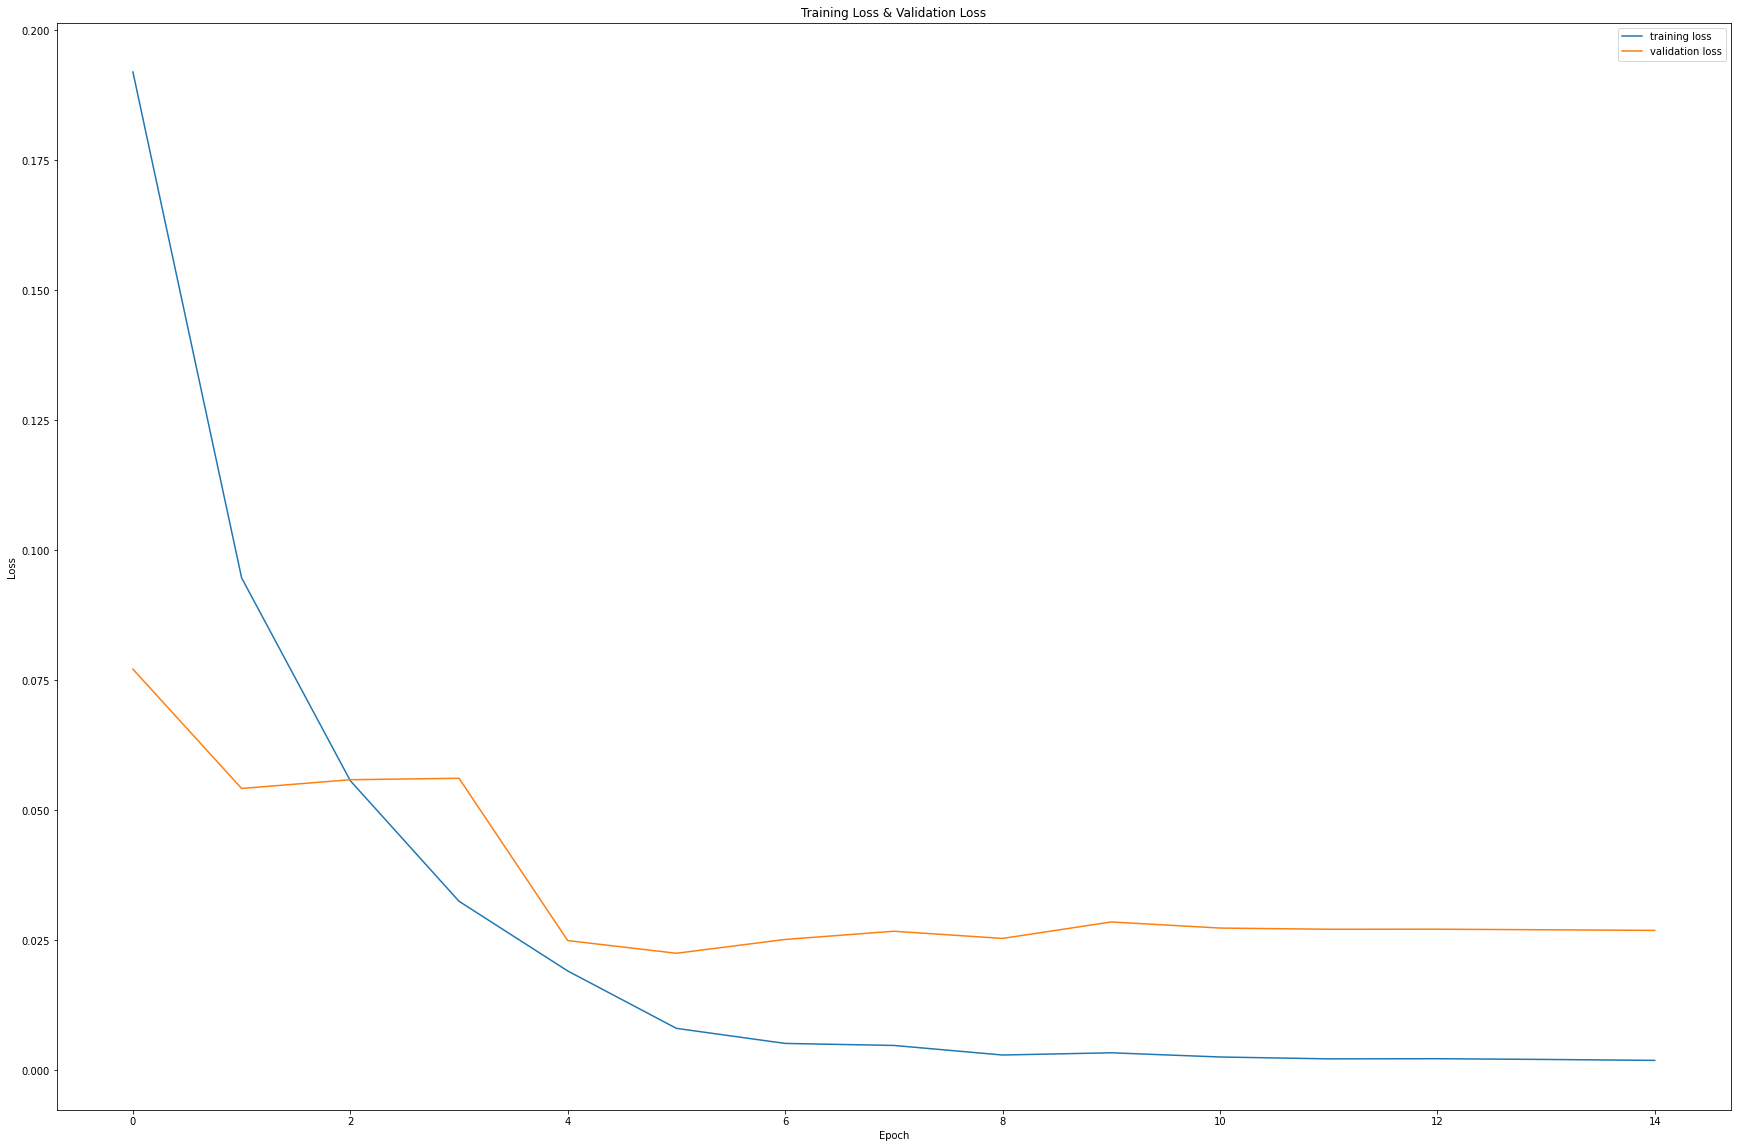

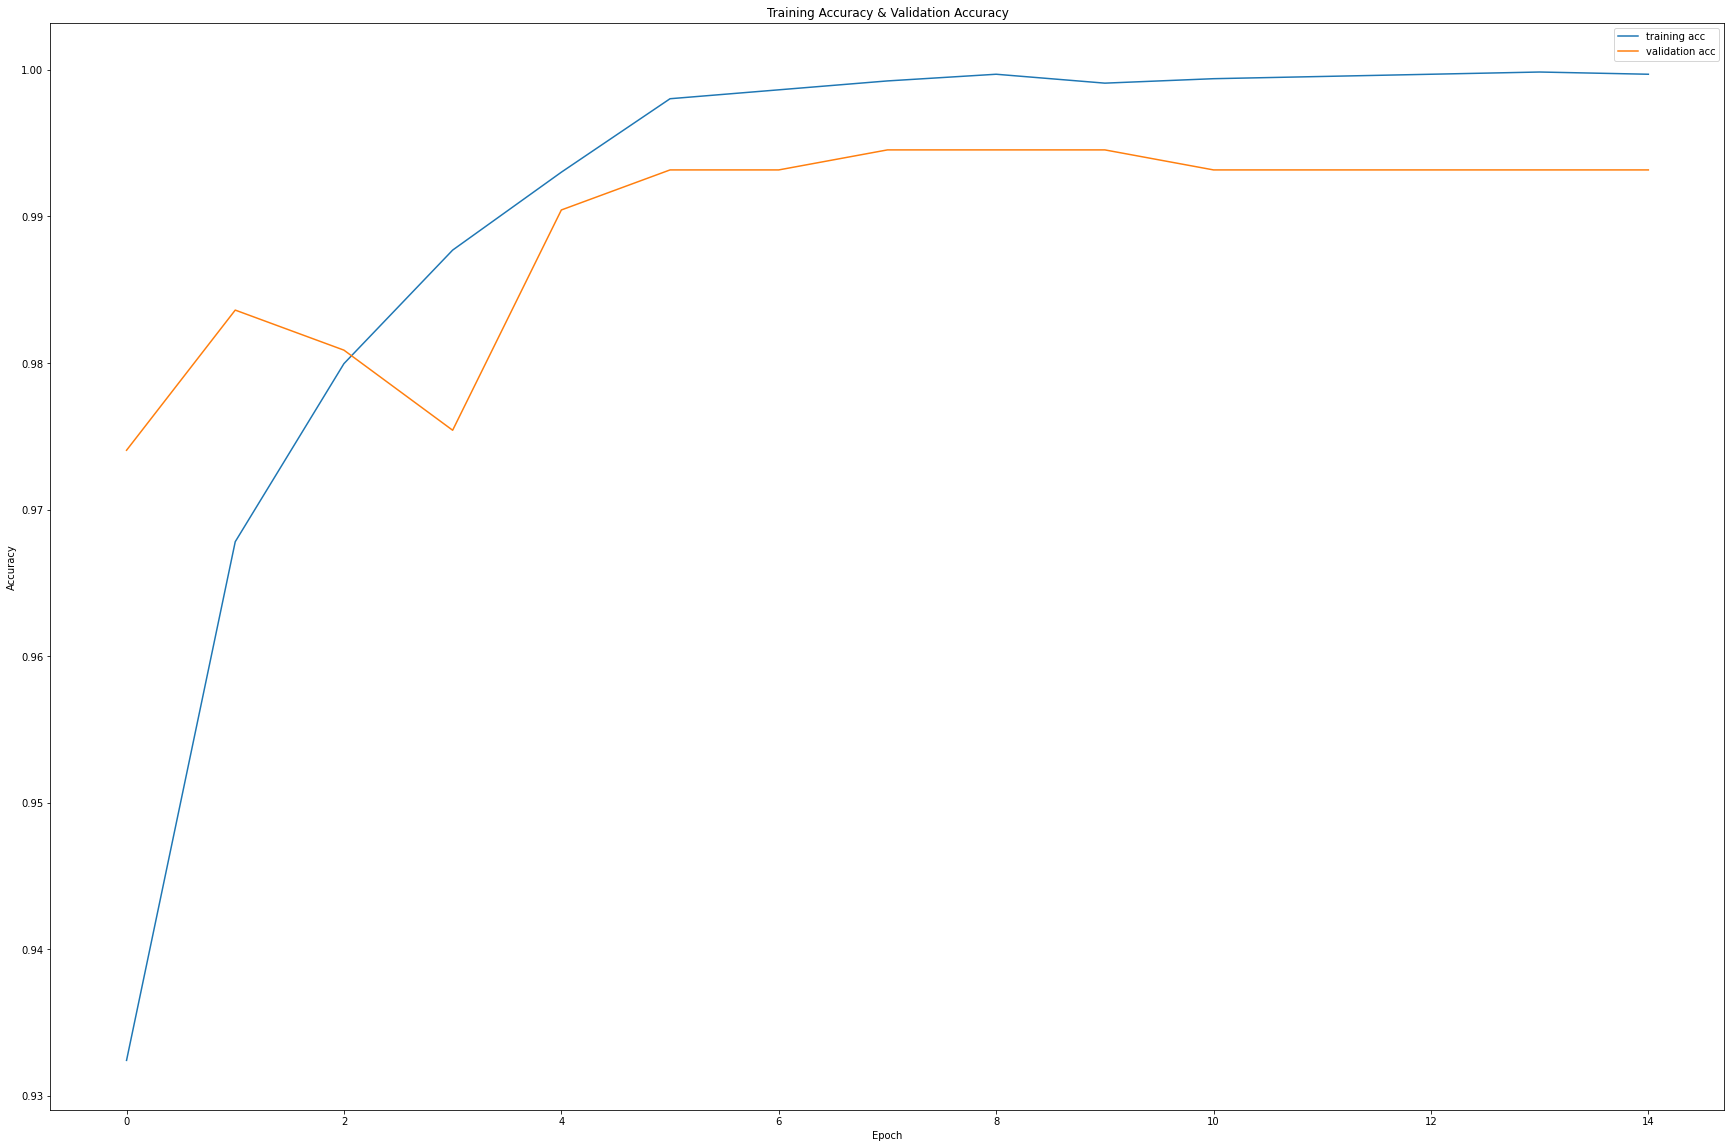

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(30,20))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

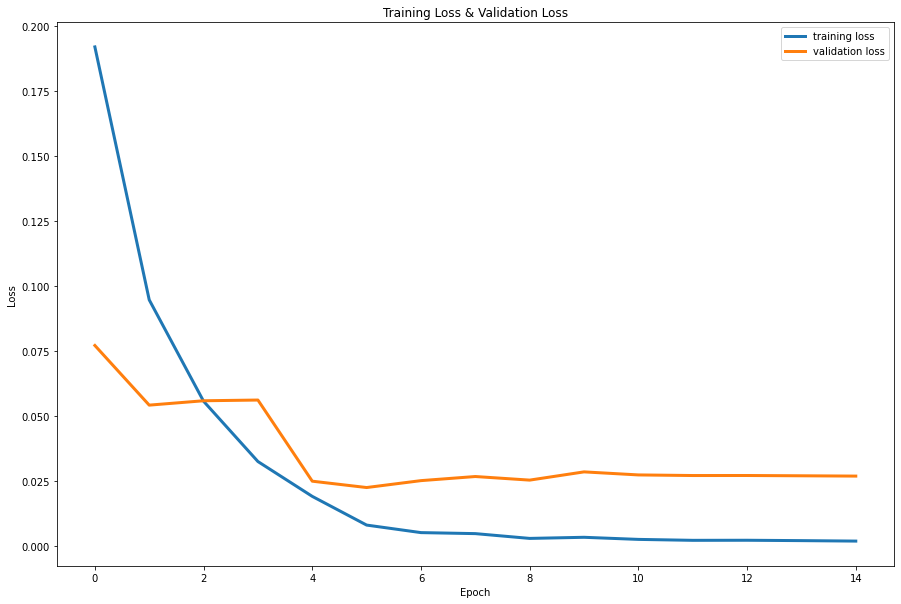

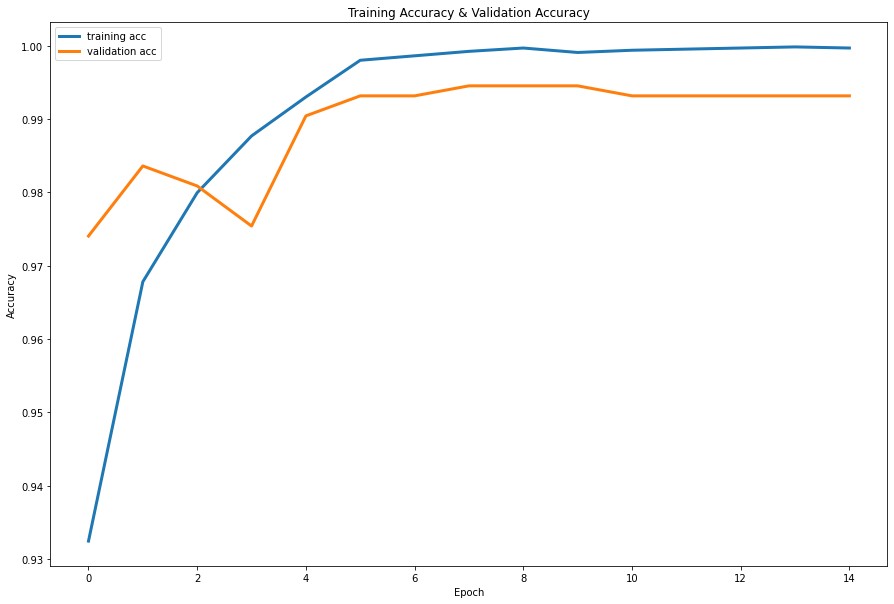

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss", linewidth=3)
plt.plot(hist.history["val_loss"],label = "validation loss", linewidth=3)
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc", linewidth=3)
plt.plot(hist.history["val_accuracy"],label = "validation acc", linewidth=3)
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


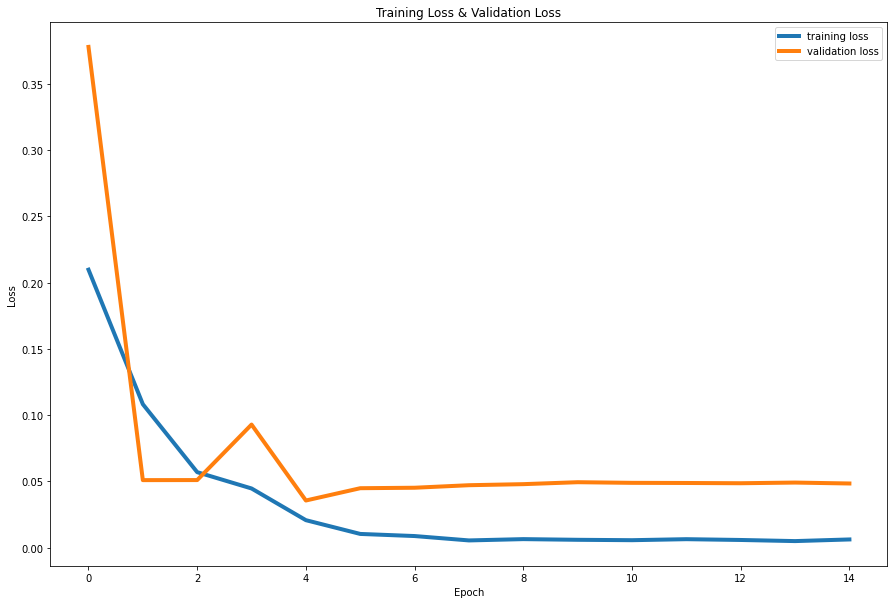

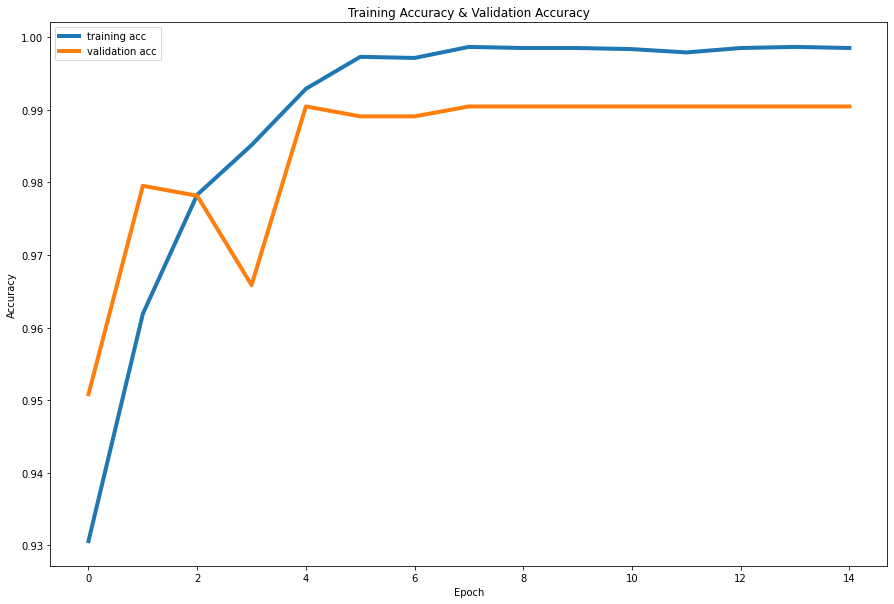

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss", linewidth=4)
plt.plot(hist.history["val_loss"],label = "validation loss", linewidth=4)
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc", linewidth=4)
plt.plot(hist.history["val_accuracy"],label = "validation acc", linewidth=4)
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


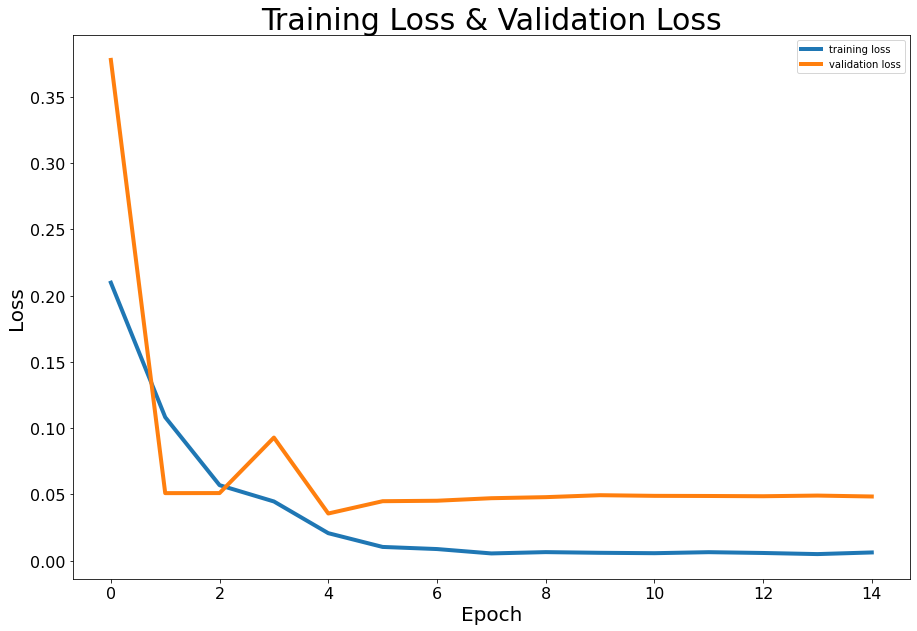

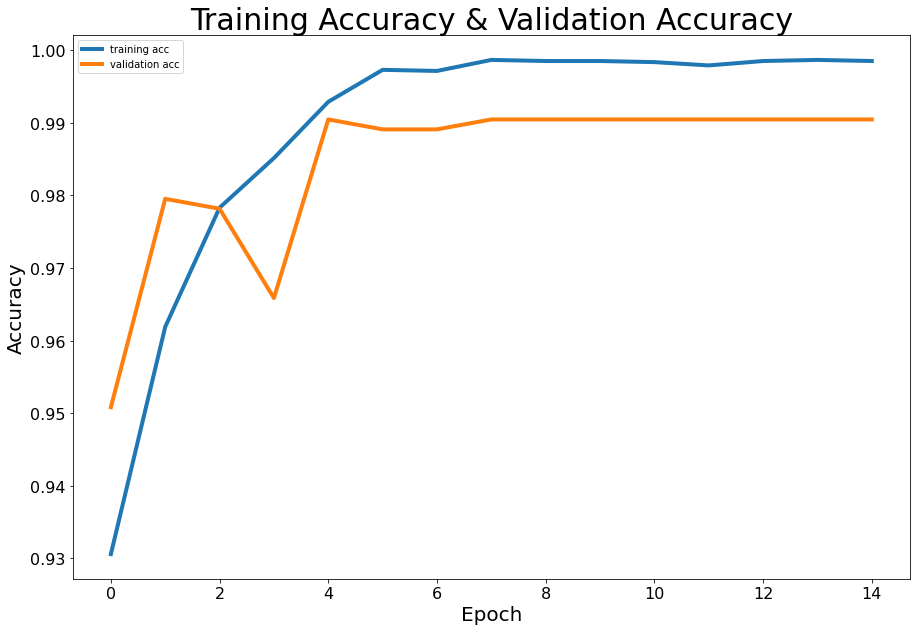

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss", linewidth=4)
plt.plot(hist.history["val_loss"],label = "validation loss", linewidth=4)
plt.title("Training Loss & Validation Loss", fontsize=30)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc", linewidth=4)
plt.plot(hist.history["val_accuracy"],label = "validation acc", linewidth=4)
plt.title("Training Accuracy & Validation Accuracy", fontsize=30)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()


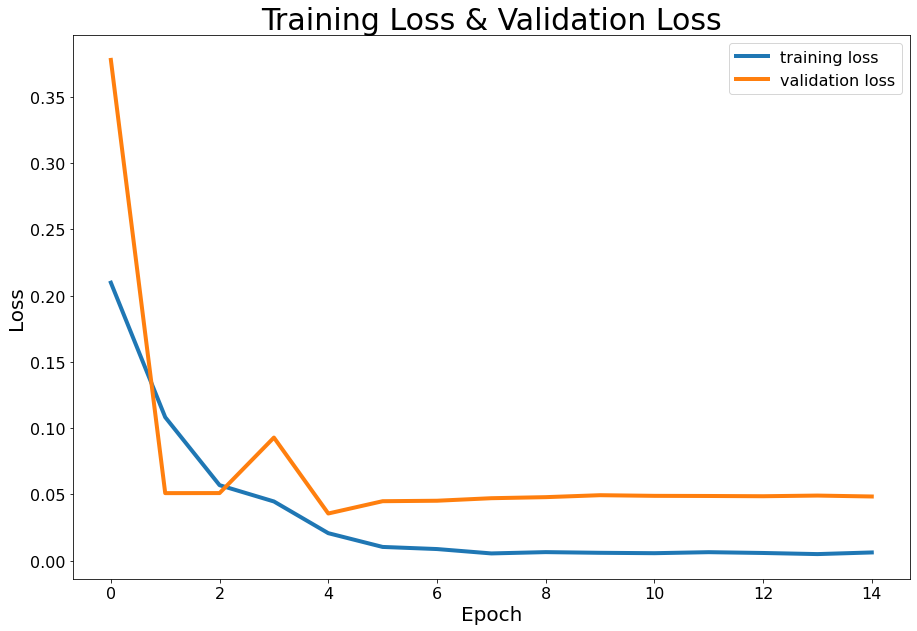

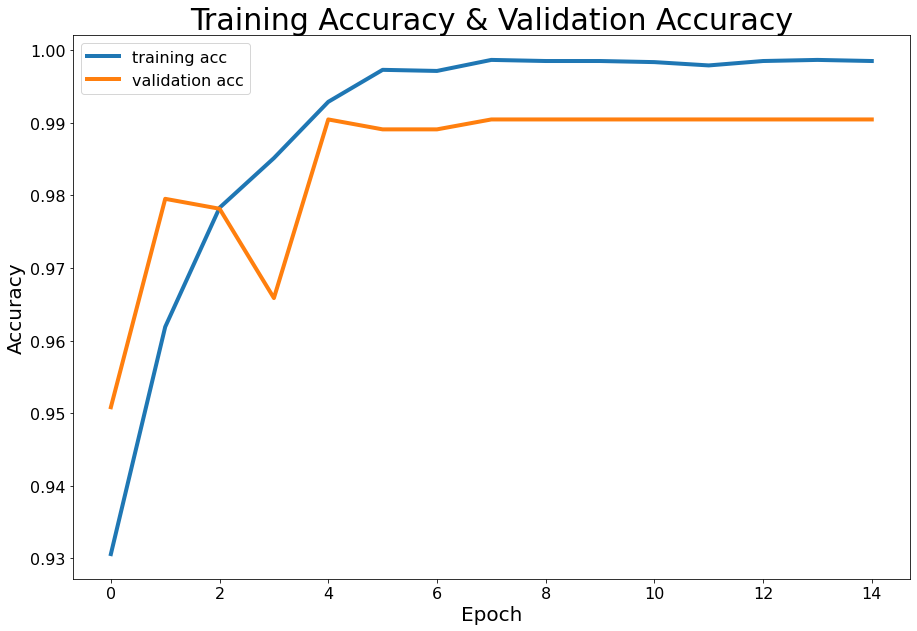

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss", linewidth=4)
plt.plot(hist.history["val_loss"],label = "validation loss", linewidth=4)
plt.title("Training Loss & Validation Loss", fontsize=30)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc", linewidth=4)
plt.plot(hist.history["val_accuracy"],label = "validation acc", linewidth=4)
plt.title("Training Accuracy & Validation Accuracy", fontsize=30)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

58/58 [==============================] - 6s 69ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       199
           1       0.97      0.98      0.97       528
           2       0.99      0.98      0.98       875
           3       1.00      1.00      1.00       228

    accuracy                           0.98      1830
   macro avg       0.99      0.99      0.99      1830
weighted avg       0.98      0.98      0.98      1830



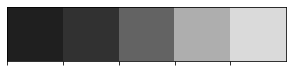

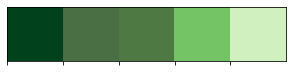

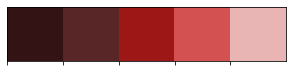

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[197   0   2   0]
 [  0 517  11   0]
 [  0  17 858   0]
 [  0   0   0 228]]


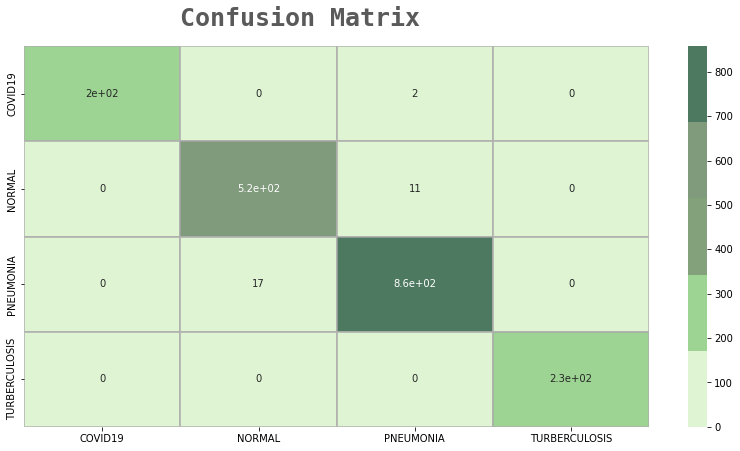

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )
fig.text(s='Confusion Matrix',
         size=25,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()

[[197   0   2   0]
 [  0 517  11   0]
 [  0  17 858   0]
 [  0   0   0 228]]


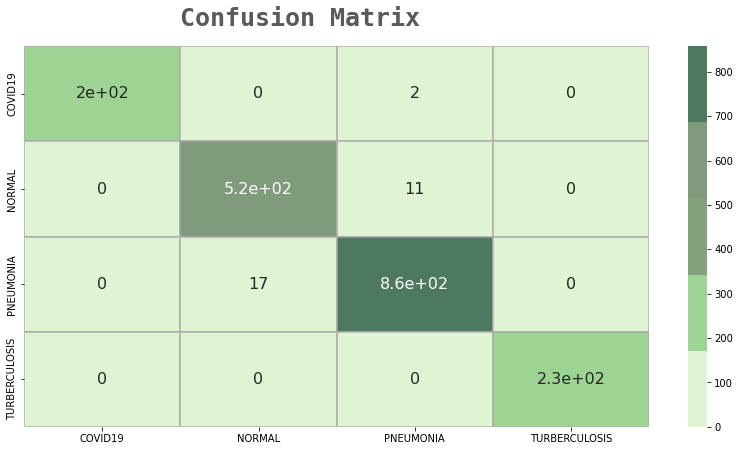

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3],
            annot_kws={"fontsize": 16}  # tamanho da fonte dos resultados
            )

fig.text(s='Confusion Matrix',
         size=25,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()

[[197   0   2   0]
 [  0 517  11   0]
 [  0  17 858   0]
 [  0   0   0 228]]


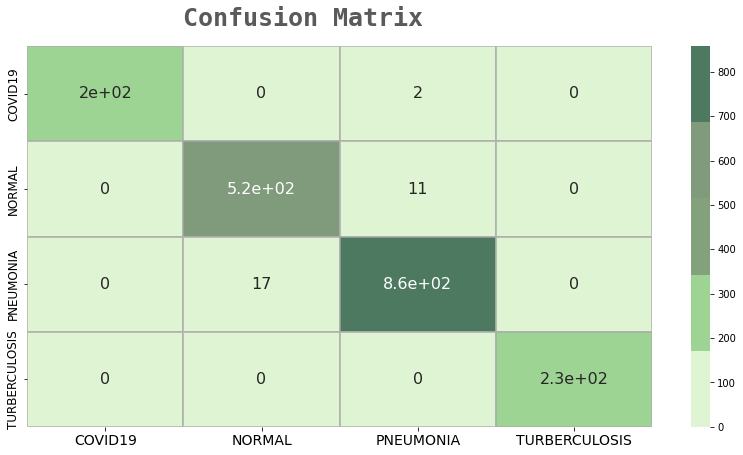

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new, pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3],
            annot_kws={"fontsize": 16}, # tamanho da fonte dos resultados
            )
ax.tick_params(axis='both', which='major', labelsize=14) # tamanho da fonte dos eixos x e y
ax.set_xticklabels(labels, fontsize=14) # tamanho da fonte das barras laterais x
ax.set_yticklabels(labels, fontsize=12) # tamanho da fonte das barras laterais y
fig.text(s='Confusion Matrix',
         size=25,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()

# Barixando os resultados para fazer *assemble*

In [ ]:
# obter as previsões para cada imagem de teste
y_pred = model.predict(X_test)

# obter a classe prevista para cada imagem de teste (classe com maior probabilidade)
y_pred_classes = y_pred.argmax(axis=-1)

# armazenar as previsões em uma matriz
predictions = y_pred_classes.reshape(-1, 1)

import pandas as pd

# criar um DataFrame a partir da matriz de previsões
df_predictions = pd.DataFrame(predictions, columns=['Predicted Class'])

# imprimir o DataFrame
print(df_predictions)

58/58 [==============================] - 4s 73ms/step
      Predicted Class
0                   0
1                   1
2                   2
3                   1
4                   2
...               ...
1825                2
1826                1
1827                1
1828                2
1829                1

[1830 rows x 1 columns]


In [ ]:
from google.colab import files
import pandas as pd

# criar um DataFrame a partir da matriz de previsões
df_predictions = pd.DataFrame(predictions, columns=['Predicted Class'])

# salvar o DataFrame em um arquivo Excel
df_predictions.to_excel('predictions.xlsx', index=False)

# baixar o arquivo para o seu computador
files.download('predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

# Encontra o índice do valor máximo em cada linha da matriz
y_test_pred = np.argmax(y_test, axis=1)

# Transforma o vetor unidimensional em um vetor coluna
y_test_pred_col = y_test_pred.reshape(-1, 1)

from google.colab import files

# Transforma o vetor unidimensional em um vetor coluna
y_test_pred_col = y_test_pred.reshape(-1, 1)

# Cria um DataFrame a partir do vetor coluna
df_y_test_pred = pd.DataFrame(y_test_pred_col, columns=['Predicted Class'])

# Escreve o DataFrame em um arquivo Excel
filename = 'y_test_pred.xlsx'
df_y_test_pred.to_excel(filename, index=False)

# Baixa o arquivo Excel para o computador
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>